# Simple Face Mask Detection - Q1

**Introduction**

In this notebook, we will be evaluating your basic image/video data pre-processing and computer vision based modeling skills. You will be evaluated under three key ares in any computer vision task namely,

- Basic Preprocessing Techniques
- Basic Model Developement
- Basic Inference Techniques

**Task Description**

With the covid-19 pandemic face mask detection is a very common problem nowdays in industry with many differnt solutions. Computer vision based solutions are still capable of identifying face masks in both still images and videos rather than other solutions. Developers suggested and developed many libraries and APIs to detect face masks using computer vision. In this notebook you will be asked to develop a simple face mask detection algorithm using computer vision.

**Dataset Description**

You can use Q4 Dataset.zip to get the datatset for this task. Dataset contains images for two different classes which are masked faces and without masked faces.

- Mased faces - A folder contains 5000 face images with mask.
- Without Mased faces - A folder contains 5000 face images without mask.

**Code Structure**

Complete task is divided into three sepearte areas that are mentioned in **Introduction** section. You need to develop sepearte *python fucntions* to each functionality and wrap them up in one *python class* for each section. You may given predefined functions which are expected to be implemented by you and carry more weight on the final score. hence **DO NOT** remove those functions yet you can add any additional functions as you need.

**Hint: You have to create 3 sepearte classes for each key area and wrap all the functions within those classes as needed**

In [1]:
# Sample Class

class TestClass_1:

    def __init__(self):
        pass

    def method_1(self, parameter_1):
        pass

    def method_2(self, parameter_2):
        pass

    # There can be many methods

    def method_3(self, parameter_3):
        pass

### Basic Preprocessing Techniques

There are many vision based preprocessing techniques are out there. You will be asked to apply basic techniques such as,
- Input images/videos and read them
- Change color channels
- Crop, Resize etc

In [2]:
# Importing required libraries

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

# Any additional libraries go under here
import tensorflow as tf
import PIL.Image as Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, InputLayer, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
class BasicPreprocessing:

    def __init__(self):
        self.train = None
        self.validation = None
        self.test = None
        self.dataset = []
        self.labels = []

    def import_dataset(self, path):
        """
        Method
        ------
            Import the given dataset.
        
        Parameters
        ----------
            As required
          
        """
        for sub in os.listdir(path):
            sub_folder = os.path.join(path, sub)

            for files in os.listdir(sub_folder):
                img_path = os.path.join(sub_folder, files)
                img = np.asarray(Image.open(img_path).convert('RGB'))
                self.dataset.append(img)
                self.labels.append(sub)

    def bgr_2_gray(self):
        """
        Method
        ------
            Convert images to gray scale.
        
        Parameters
        ----------
            As required
          
        """
        if self.dataset:
            for i in range(len(self.dataset)):
                self.dataset[i] = cv2.cvtColor(self.dataset[i], cv2.COLOR_BGR2GRAY)

    def resize(self, width, height):
        """
        Method
        ------
            Resize every image to maintain the consistency.
        
        Parameters
        ----------
            As required
          
        """
        if self.dataset:
            for i in range(len(self.dataset)):
                self.dataset[i] = cv2.resize(self.dataset[i], dsize=(width, height))

    def normalize(self):
        """
        Method
        ------
            Normalized the extracted values to solve the model learning challenge.
        
        Parameters
        ----------
            As required
          
        """
        if self.dataset:
            for i in range(len(self.dataset)):
                self.dataset[i] = cv2.normalize(self.dataset[i], None,
                                                alpha=0, beta=1,
                                                norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    def cate_to_dummy(self):
        """
        Method
        ------
            Perform one-hot encoding or any other encoding method to convert categorical data into numbers.
        
        Parameters
        ----------
            As required
          
        """
        if self.labels:
            for i in range(len(self.labels)):
                if self.labels[i] == 'with_mask':
                    self.labels[i] = 1
                else:
                    self.labels[i] = 0
                    
            self.labels = np.asarray(self.labels)

    def reshape_data(self):
        """
        Method
        ------
            Perform reshaping functions to reshape data in a way that a model can take.
        
        Parameters
        ----------
            As required
          
        """
        n, w, h = np.asarray(self.dataset).shape
        self.dataset = np.asarray(self.dataset).reshape(n,w,h,1)


    def train_test(self):
        """
        Method
        ------
            Split data into training, testing and validation if needed.
        
        Parameters
        ----------
            As required
          
        """
        train_images, valid_images, train_labels, valid_labels = train_test_split(self.dataset, self.labels, test_size=0.2)
        valid_images, test_images, valid_labels, test_labels = train_test_split(valid_images, valid_labels, test_size=0.1)

        self.train = [train_images, train_labels]
        self.validation = [valid_images, valid_labels]
        self.test = [test_images, test_labels]

### Basic Model Development

There are many ways that you can develop either a machine learing model or deep learning model. Also you can use pretrained models like Resnet50, VGG16, VGG19 etc. But under this task you will be asked to develop a simple model without using any pretrained model.

**Hint: Use tensorflow, pytorch or any ML framework you are comfortable with to extract features**

In [4]:
class ModelDevelopment:

    def __init__(self):
        self.model = None
        self.history = None
        self.input_shape = (128, 128, 1)

    def extract_image_features(self):
        """
        Method
        ------
            Develop Convolutional layers to extract features. This involves adding activation functions and pooling layers too.
        
        Parameters
        ----------
            As required
          
        """
        self.model = Sequential([InputLayer(self.input_shape),
                                 Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation=relu),
                                 MaxPooling2D(),
                                 BatchNormalization(),
                                 Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation=relu),
                                 MaxPooling2D(),
                                 BatchNormalization(),
                                 Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation=relu),
                                 MaxPooling2D(),
                                 BatchNormalization(),
                                 Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation=relu),
                                 MaxPooling2D(),
                                 Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation=relu),
                                 MaxPooling2D(),
                                 GlobalAveragePooling2D(),
                                 Dense(units=1, activation='sigmoid')
                                 ])
        self.model.compile(optimizer=Adam(),
                           loss=binary_crossentropy,
                           metrics=['accuracy'])
        self.model.summary()

    def train_model(self, x, y, validation_data, epoch, batch_size):
        """
        Method
        ------
            Develop a machine learning or deep learning algorithm to train extracted features.
            
            Hint: You can use a simple binary classification algorithm such as logistic regression, random forest or
            you can use a neural network to do this task.
        
        Parameters
        ----------
            As required
          
        """
        self.history = self.model.fit(x, y,
                                      epochs=epoch,
                                      batch_size=batch_size,
                                      validation_data=validation_data)

    def test_model(self, x, y):
        """
        Method
        ------
            Implement a function to test your model and give the accuracy.
        
        Parameters
        ----------
            As required
          
        """
        loss, acc = self.model.evaluate(x,y, verbose=0)
        return acc

    def plot_graphs(self):
        """
        Method
        ------
            Implement a function to plot the accuracy graph and loss graph for both training and testing.
        
        Parameters
        ----------
            As required
          
        """
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,6], dpi=300)
        axes = axes.ravel()
        xs = list(range(len(self.history.history['loss'])))

        sns.lineplot(x=xs, y=self.history.history['loss'], ax=axes[0], label='train')
        sns.lineplot(x=xs, y=self.history.history['val_loss'], ax=axes[0], label='validation')
        sns.lineplot(x=xs, y=self.history.history['accuracy'], ax=axes[1], label='train')
        sns.lineplot(x=xs, y=self.history.history['val_accuracy'], ax=axes[1], label='validation')
        
        # set graph axes labels
        axes[0].set_xlabel('epoch')
        axes[1].set_xlabel('epoch')
        axes[0].set_ylabel('loss')
        axes[1].set_ylabel('accuracy')
        
        plt.show()

### Basic Inference Techniques

In here you will be asked to develop a detection method to detect masked faces in static images.

In [5]:
class BasicInference:

    def __init__(self, model):
        self.model = model
        self.face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        self.mask = 'face with mask'
        self.no_mask = 'face without mask'
        self.font = cv2.FONT_HERSHEY_SIMPLEX
        self.text_scale = 0.8

    def detect_images(self, path):
        """
        Method
        ------
            Implement a function to read images and classify those faces to either faces with masks or faces without masks.
            
            Hint: Use haarcascade_frontalface_default to detect faces in a static image.
        
        Parameters
        ----------
            As required
          
        """
        static_image = np.asarray(Image.open(path).convert('RGB'))

        faces = self.face_detector.detectMultiScale(static_image, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            roi = static_image[y:y + h, x:x + w]
            process_roi = self.pre_process(roi)
            mask = self.model.predict(process_roi)

            if mask > 0.5:
                cv2.rectangle(static_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(static_image, self.mask, org=(x + 50, y - 10), fontFace=self.font, fontScale=self.text_scale, color=(0, 255, 0), thickness=2)
            elif mask <= 0.5:
                cv2.rectangle(static_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.putText(static_image, self.no_mask, org=(x + 50, y - 10), fontFace=self.font, fontScale=self.text_scale, color=(0, 0, 255), thickness=2)

        return static_image

    # All other customized methods go under here

    def pre_process(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, dsize=(128, 128))
        img = cv2.normalize(img, None,
                            alpha=0, beta=1,
                            norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        img = img.reshape(1, 128, 128, 1)

        return img

Rootcode AI - Internship Practical (Computer Vision)


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
2022-07-18 20:48:19.446456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 20:48:19.589812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 20:48:19.590674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 20:48:19.592340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       1

2022-07-18 20:48:22.323280: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-07-18 20:48:23.858067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


189/189 [==============================] - 12s 25ms/step - loss: 0.6387 - accuracy: 0.6885 - val_loss: 2.1493 - val_accuracy: 0.4893
Epoch 2/10
189/189 [==============================] - 4s 22ms/step - loss: 0.3666 - accuracy: 0.8390 - val_loss: 2.7614 - val_accuracy: 0.4893
Epoch 3/10
189/189 [==============================] - 4s 22ms/step - loss: 0.2331 - accuracy: 0.9025 - val_loss: 0.8262 - val_accuracy: 0.6497
Epoch 4/10
189/189 [==============================] - 4s 22ms/step - loss: 0.1721 - accuracy: 0.9335 - val_loss: 1.5149 - val_accuracy: 0.6600
Epoch 5/10
189/189 [==============================] - 4s 21ms/step - loss: 0.1275 - accuracy: 0.9547 - val_loss: 0.6908 - val_accuracy: 0.6645
Epoch 6/10
189/189 [==============================] - 4s 22ms/step - loss: 0.1180 - accuracy: 0.9581 - val_loss: 0.1314 - val_accuracy: 0.9544
Epoch 7/10
189/189 [==============================] - 4s 21ms/step - loss: 0.0726 - accuracy: 0.9763 - val_loss: 0.1558 - val_accuracy: 0.9411
Epoch 8/1

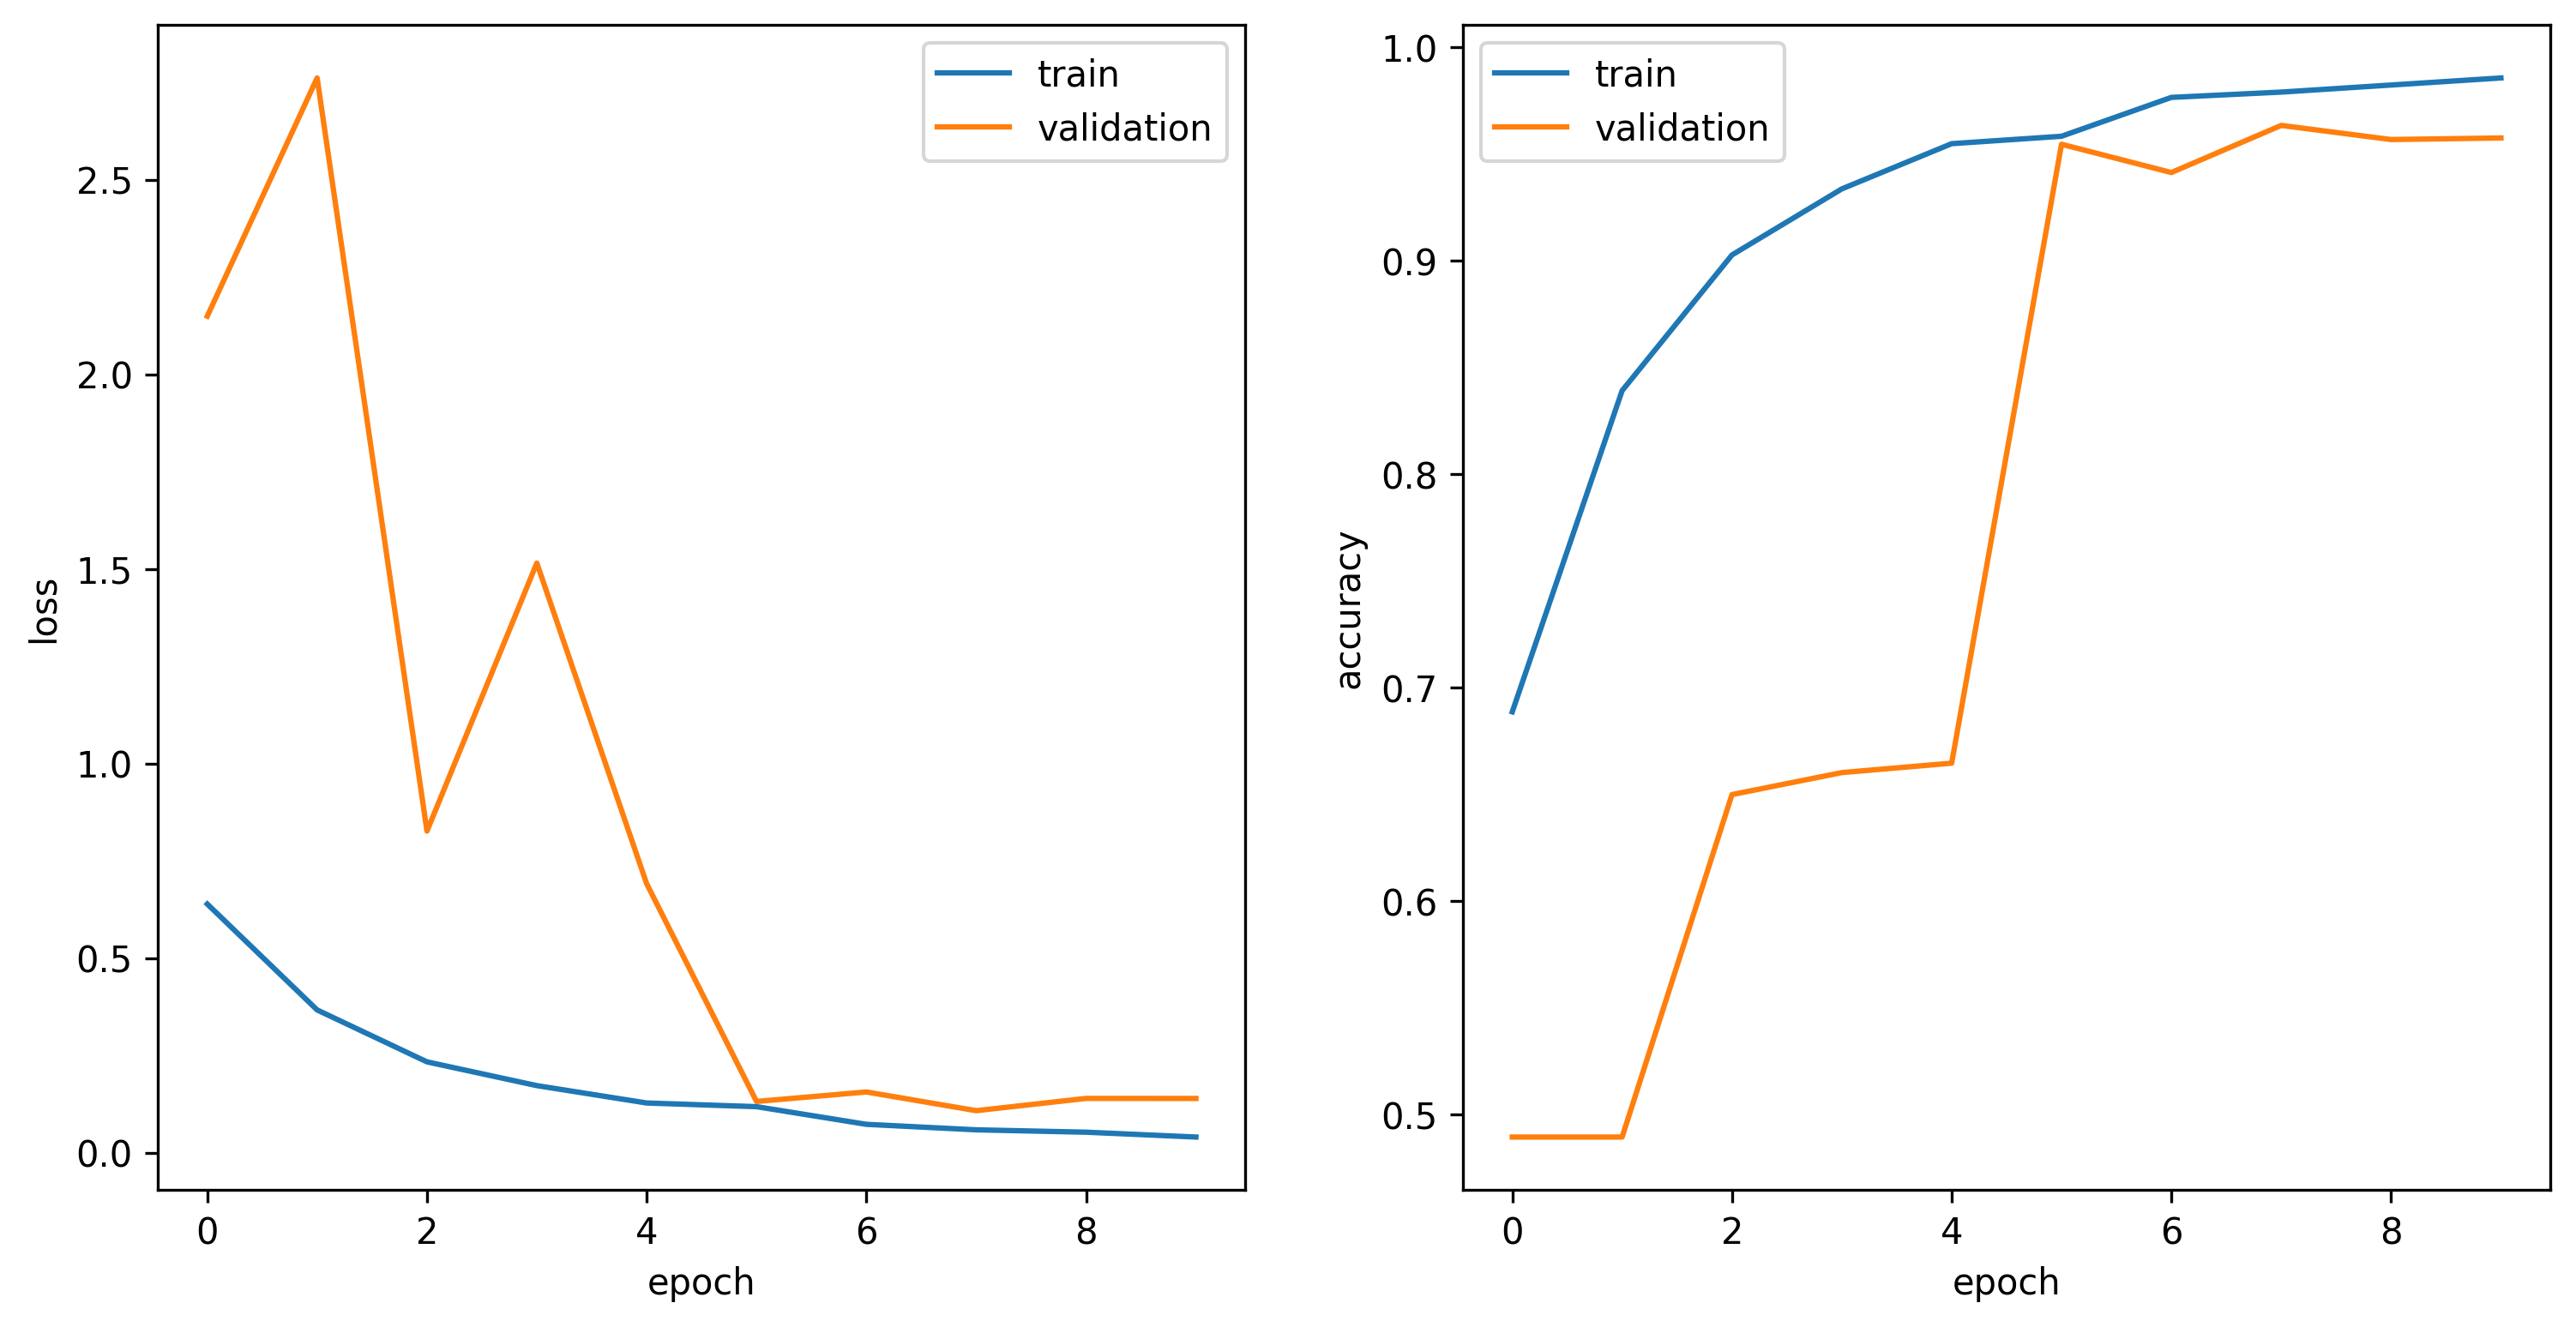

test accuracy: 0.9342105388641357


In [6]:
# You can use this space to play with classes and implement the main() fucntion

process = BasicPreprocessing()
model_dev = ModelDevelopment()
    
def main():
    print("Rootcode AI - Internship Practical (Computer Vision)")

    # prepare data to train
    process.import_dataset(path='data')
    process.bgr_2_gray()
    process.resize(128, 128)
    process.normalize()
    process.cate_to_dummy()
    process.reshape_data()
    process.train_test()
    
    # model creation and training
    model_dev.extract_image_features()
    model_dev.train_model(x=process.train[0], y=process.train[1], 
                      validation_data=(process.validation[0], process.validation[1]), 
                      epoch=10, 
                      batch_size=32)
    model_dev.plot_graphs()
    print(f'test accuracy: {model_dev.test_model(process.test[0], process.test[1])}')

main()

## Detections

In [7]:
inference = BasicInference(model_dev.model)

In [8]:
url = 'https://cdn.britannica.com/15/215715-050-496D93EB/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg?q=60'
Image.open(requests.get(url, stream=True).raw).save('test_image.jpg')

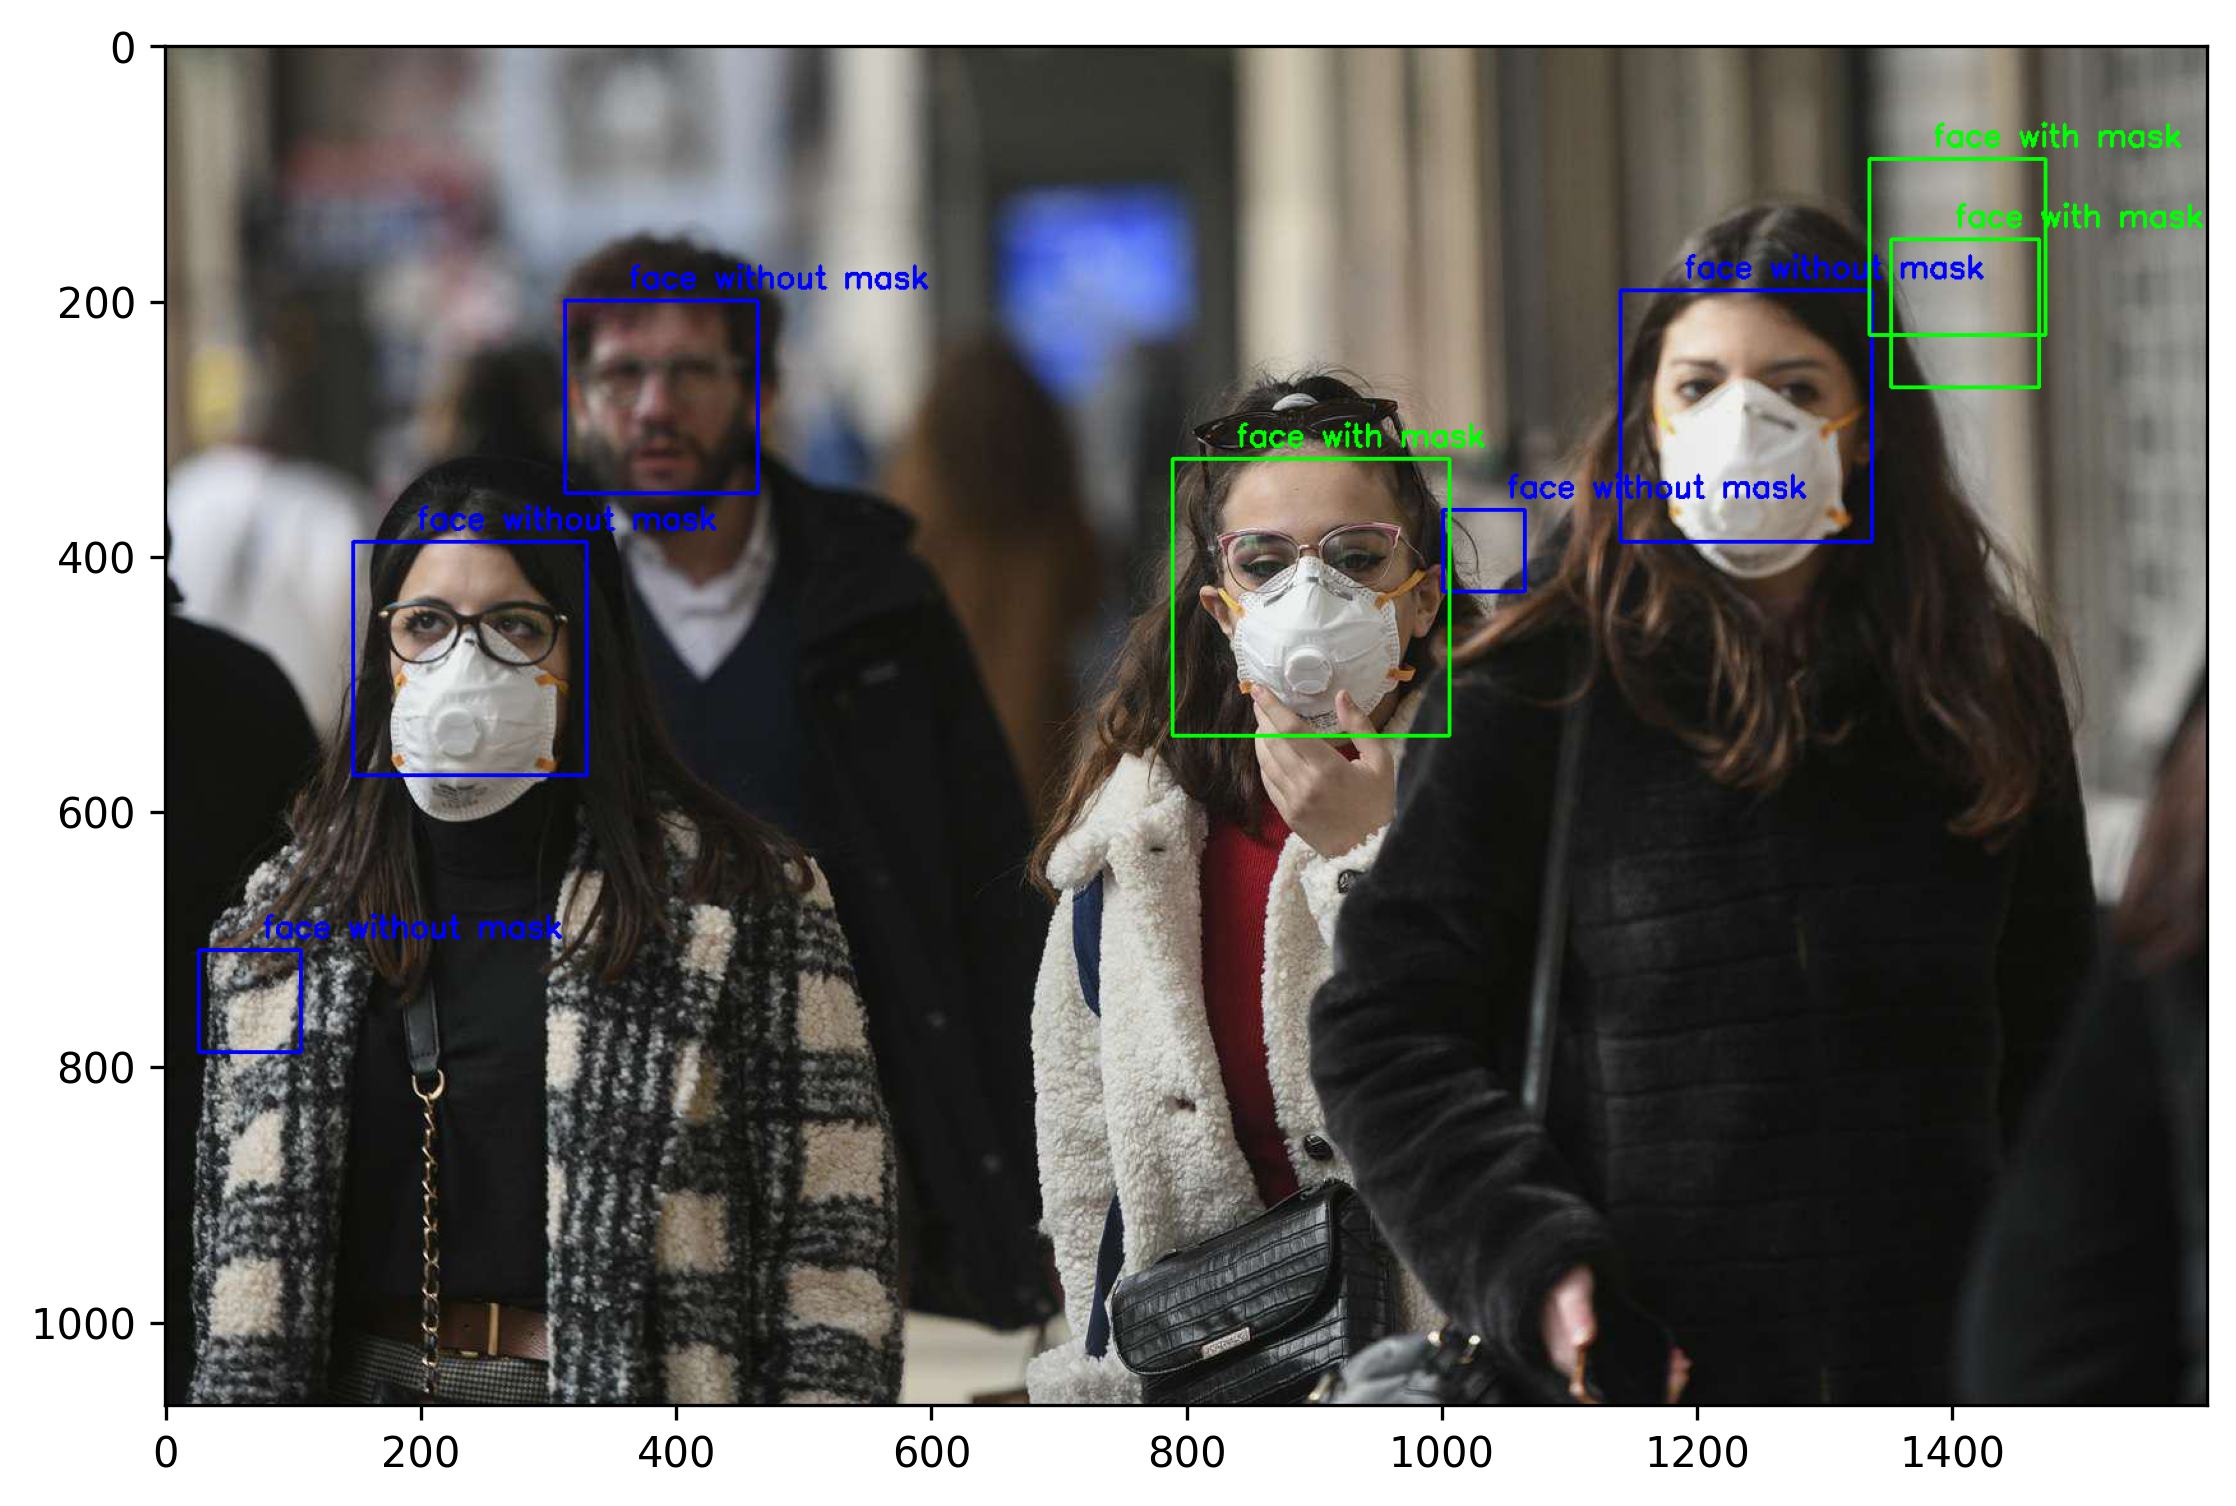

In [10]:
plt.figure(figsize=[12,6], dpi=300)
plt.imshow(inference.detect_images('test_image.jpg'))
plt.show()